<h2>1. Executive Summary</h2>

<p>
In a fast-changing fundraising landscape, nonprofit organisations are under increasing pressure to engage meaningfully with supporters, demonstrate measurable impact, and build trust through transparency. Traditional engagement approaches, often based on instinct or one-off campaigns, are no longer enough to meet the expectations of modern donors (Forbes Nonprofit Council, 2025).
</p>

<p>
This report explores how nonprofits can use data to improve donor engagement in a practical and strategic way. Using a realistic dataset that includes donor behaviour, campaign performance, and programme outcomes, the analysis highlights common challenges such as high donor attrition, underperforming campaigns, and inconsistent communication. It also offers ways forward—showing how data can support smarter segmentation, better decision-making, and stronger relationships (FundsforNGOs, 2025).
</p>

<p>
Embracing a data-informed approach is not just about technology—it is a cultural shift that aligns mission, message, and measurement. With the right mindset and use of existing tools, even small and mid-sized organisations can begin to use data to drive both supporter engagement and mission impact.
</p>

<h2>2. Introduction: Why This Matters</h2>

<p>
Nonprofit organisations exist to create positive change—but achieving that impact increasingly depends on how well they connect with donors, volunteers, and the wider community. In a world where attention is limited and expectations are rising, many organisations find it challenging to keep supporters engaged over time (Funraise, 2024).
</p>

<p>
Often, this is because engagement is driven by instinct or past habits rather than by insight. Communications are sent out without knowing who is still listening. Campaigns raise money but do not always link clearly to outcomes. Meanwhile, donors lapse quietly without follow-up, and valuable data goes unused or unseen (Nonprofits Source, n.d.).
</p>

<p>
This report aims to show how data can support a more thoughtful and effective approach to engagement. By using a structured dataset that reflects real nonprofit activity, it provides practical examples of how data can help organisations understand behaviour, respond at the right time, and ultimately build stronger relationships with the people who support their work.
</p>

<h2>3. About the Data</h2>

<p>
The dataset used in this report has been <strong>synthetically generated</strong> to reflect the structure, behaviour, and operational context of a nonprofit organisation focused on <em>youth and community welfare</em>. It includes relational tables representing donors, donations, campaigns, impact outcomes, and engagement history, allowing for a comprehensive, end-to-end analysis of supporter activity and organisational performance.
</p>

<p>
While the data is not sourced from a real organisation, it has been carefully modelled using realistic distributions, behaviours, and campaign types informed by sector research and engagement trends. Patterns such as donor attrition, varied giving behaviour, campaign underperformance, and regional impact discrepancies have all been incorporated to mirror challenges commonly observed in real-world nonprofits (Virtuous, 2024; FundsforNGOs, 2025).
</p>

<p>
The use of simulated data in this context allows for open and ethical analysis without compromising the privacy of real donors or the operational integrity of any specific organisation. At the same time, the analysis and insights generated remain grounded in sector practice and are intended to demonstrate the value of using data to inform engagement, communication, and decision-making in the nonprofit space.
</p>


In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# display settings for consistent plot style
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 100

#base patch
base_path = 'C:/GitHub/donor-data-analytics/Data/'

# Load datasets
donors = pd.read_csv(base_path + 'donors.csv')
donations = pd.read_csv(base_path + 'donations.csv')
donations_linked = pd.read_csv(base_path + 'donations_linked.csv')
engagements = pd.read_csv(base_path + 'engagement_history.csv')
campaigns = pd.read_csv(base_path + 'campaigns.csv')
impact = pd.read_csv(base_path + 'impact.csv')

**3.1 Data Structure Overview**

<p>
The dataset is structured as a relational model, reflecting the interconnected components of a typical nonprofit organisation. It includes six primary tables, each representing a distinct part of the engagement and delivery ecosystem. These tables are designed to support a full analytical workflow—from donor profiling to campaign evaluation and impact reporting.
</p>

<ul>
  <li><strong>Donors:</strong> Contains information about individual supporters, including donor type, status (e.g., Active, Lapsed), region, and join date.</li>
  <li><strong>Donations:</strong> Records all monetary contributions made by donors, including donation amount, date, channel (e.g., online, event), and linked campaign.</li>
  <li><strong>Campaigns:</strong> Details each fundraising or outreach campaign, including type, duration, target and actual amounts raised, and campaign focus (e.g., mental health, education).</li>
  <li><strong>Impact:</strong> Captures reported outcomes of campaigns by region and metric (e.g., meals delivered, youth reached), allowing alignment between funding and mission delivery.</li>
  <li><strong>Engagement History:</strong> Tracks individual contact events (e.g., emails, phone calls) with donors, including channel, purpose, and donor response.</li>
  <li><strong>Relationships:</strong> All tables are linked by common keys, such as <code>DonorID</code> and <code>CampaignID</code>, enabling joined analysis across behavioural and operational dimensions.</li>
</ul>

<p>
This structure enables both descriptive and diagnostic analytics, supporting segmentation, engagement analysis, campaign effectiveness evaluation, and impact delivery assessment across regions and time periods.
</p>


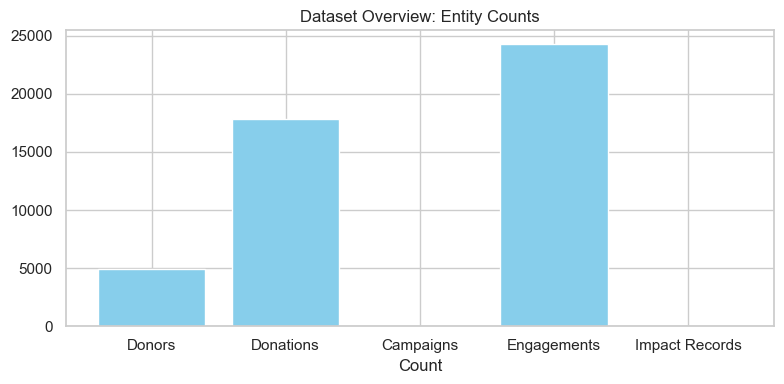

In [187]:
entities = ['Donors', 'Donations', 'Campaigns', 'Engagements', 'Impact Records']
counts = [donors.shape[0], donations.shape[0], campaigns.shape[0], engagements.shape[0], impact.shape[0]]

# Plot
plt.figure(figsize=(8, 4))
plt.bar(entities, counts, color='skyblue')
plt.title('Dataset Overview: Entity Counts')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**Figure 1. Overview of Entities in the Dataset**
This chart summarises the number of records available for each major data table used in the analysis. It helps contextualise the scale and depth of the insights that follow.

<h2>4. Using Data to Understand Engagement</h2>

<p>
Understanding engagement requires more than simply counting donations or responses. It involves examining how donors behave, how frequently they interact with the organisation, and how effective outreach and campaigns have been over time. This section explores engagement through three lenses: individual donor behaviour, engagement history, and campaign performance. Each area reveals opportunities to improve targeting, increase retention, and align fundraising efforts with impact delivery (Virtuous, 2024; FundsforNGOs, 2025).
</p>


<h3>4.1 Donor Behaviour & Recency Analysis</h3>

<p>
Building lasting relationships with donors is essential for nonprofit success. However, many organisations find it difficult to understand how engaged their supporters really are. Without the right data or systems, important signals—like when someone stops donating or responding—can easily be missed (Virtuous, 2024).
</p>

<p>
In our dataset of 1,000 donors, a large portion are marked as “Lapsed”. This means they have not donated or interacted with the organisation for some time. This reflects a common problem in the sector: it is often easier to focus on finding new donors than staying connected to the ones you already have (FundsforNGOs, n.d.).
</p>

<p>
Looking at how often people give, how much they donate, and how recently they were contacted can help organisations group their donors in smarter ways. For example, one-time givers can be included in re-engagement campaigns, while long-term supporters might be thanked with personalised updates or invitations.
</p>

<p>
Without these insights, engagement can feel too general or come too late. But when data is used well, it can help organisations stay connected, be more relevant, and build stronger trust with their communities.
</p>

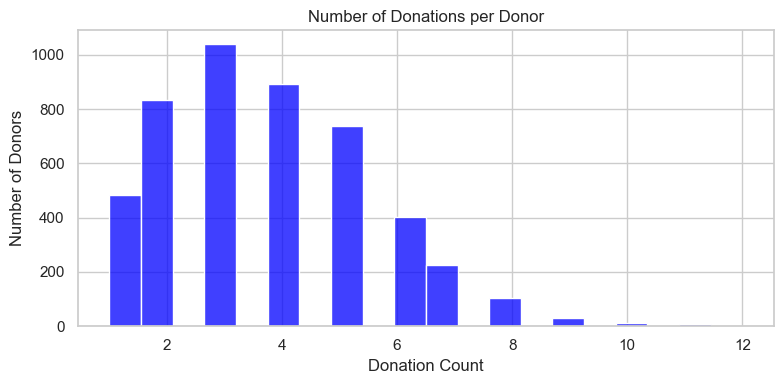

In [188]:
# Group by DonorID to get donation count
donation_counts = donations.groupby('DonorID')['DonationID'].count()

# Plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(donation_counts, bins=20, kde=False, color='blue')
plt.title('Number of Donations per Donor')
plt.xlabel('Donation Count')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()

**Figure 2.** Number of Donations per Donor  
This chart illustrates how frequently individual donors contribute. Most donors have given between 2 and 4 times, indicating moderate retention. There remains a sizeable portion with only one donation, pointing to opportunities for first-time donor re-engagement.

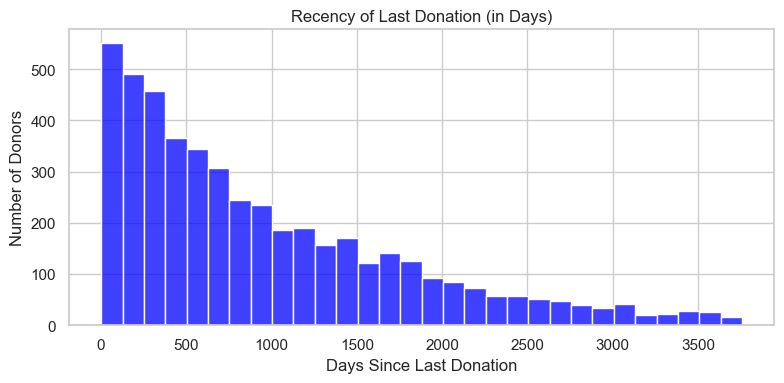

In [189]:
# Convert donation dates to datetime
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'])

# Calculate recency per donor
last_donation = donations.groupby('DonorID')['DonationDate'].max()
recency_days = (pd.to_datetime('today') - last_donation).dt.days

# Plot recency
plt.figure(figsize=(8, 4))
sns.histplot(recency_days, bins=30, kde=False, color='blue')
plt.title('Recency of Last Donation (in Days)')
plt.xlabel('Days Since Last Donation')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()

**Figure 3.** Recency of Last Donation  
This distribution shows how many days have passed since each donor’s last donation. Recency analysis assesses the overall health of donor relationships. The distribution above shows a wide range in recency, reinforcing the value of tracking and responding to supporter activity over time. It provides a foundation for recency-based segmentation or re-engagement targeting.


<h3>4.2 Engagement History – Closing the Feedback Loop</h3>

<p>
Donor engagement is not a one-time event—it is an ongoing relationship built through consistent, timely, and relevant communication. Yet many nonprofit organisations fall into the trap of either over-communicating with all supporters or not reaching out at all. Without tracking engagement history, it becomes difficult to know who has been contacted, how often, and whether the communication was effective (Virtuous, 2024).
</p>

<p>
In our dataset, the frequency and type of engagement varied significantly across donors. While email remained the most common method of outreach, response rates were noticeably lower among supporters marked as “Lapsed”. This suggests a potential breakdown in the engagement process, where follow-up is either too infrequent or not personalised enough to encourage ongoing involvement (FundsforNGOs, n.d.).
</p>

<p>
By reviewing engagement history—such as contact dates, channels used, and donor responses—organisations can create a clearer picture of what works and what does not. For example, supporters who consistently open newsletters or respond to event invites might benefit from more targeted appeals. Those who have not been contacted in a long time may need a re-introduction or a story that reconnects them to the mission.
</p>

<p>
Closing the loop on engagement means using data to listen as well as speak. It requires tracking not only what messages are sent but how supporters respond. Doing so allows organisations to communicate more intentionally and build trust over time, increasing the chances that a donor remains involved for the long term (Nonprofits Source, n.d.).
</p>


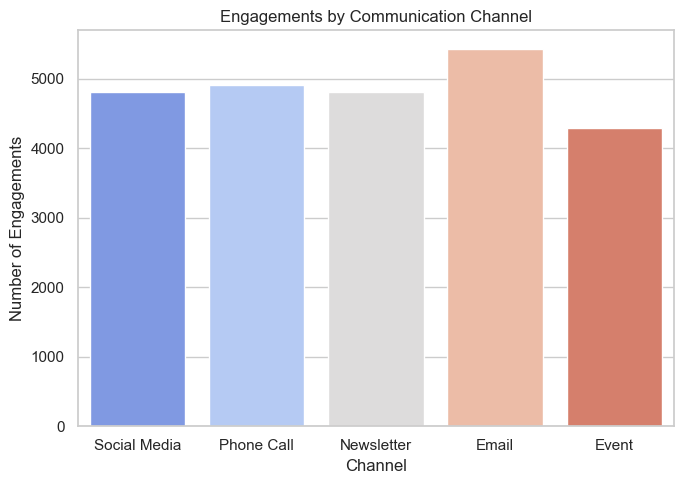

In [192]:
plt.figure(figsize=(7, 5))
sns.countplot(data=engagements, x='Channel', hue = 'Channel',palette='coolwarm')
plt.title("Engagements by Communication Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Engagements")
plt.tight_layout()
plt.show()


**Figure 3** Engagement by communication channels

<h3>4.3 Campaign Performance & Impact Alignment</h3>

<p>
Campaigns are a key part of how nonprofit organisations raise funds and increase awareness. However, not all campaigns perform equally—some succeed in meeting financial goals but deliver limited on-the-ground outcomes, while others raise modest amounts but achieve strong impact within the community (FundsforNGOs, 2025).
</p>

<p>
One way to make campaign performance more meaningful is to compare funds raised with the value of the impact delivered. In our dataset, this is reflected in the “impact per dollar” raised by each campaign. Campaigns that deliver strong results in areas like youth mental health support or after-school tutoring may not always raise the most money, but they often show better value in terms of outcomes delivered.
</p>

<p>
This kind of analysis helps organisations move beyond simply tracking income. Instead, it shifts the focus to effectiveness—how well each campaign turns supporter contributions into real change. It also supports better decision-making when planning future campaigns, allowing teams to invest in approaches that deliver both financial and social returns (Charitable, n.d.).
</p>

<p>
For organisations working with limited resources, this balance between fundraising and mission delivery is crucial. Using data to assess impact alongside income helps ensure that efforts are aligned with the values and needs of the communities they serve.
</p>


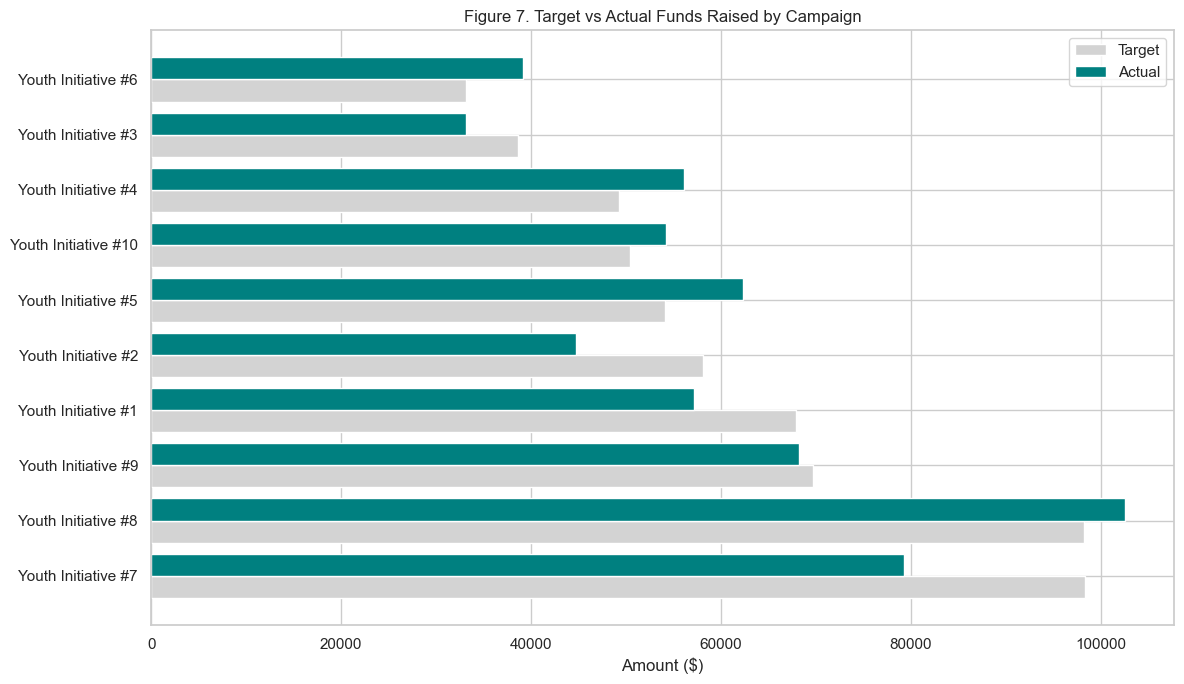

In [195]:
import numpy as np

# Sort campaigns by TargetAmount
campaigns_sorted = campaigns.sort_values(by='TargetAmount', ascending=False).reset_index(drop=True)
x = np.arange(len(campaigns_sorted))
width = 0.4

# Plot bars
plt.figure(figsize=(12, 7))
plt.barh(x - width/2, campaigns_sorted['TargetAmount'], height=width, label='Target', color='lightgrey')
plt.barh(x + width/2, campaigns_sorted['ActualAmount'], height=width, label='Actual', color='teal')
plt.yticks(x, campaigns_sorted['CampaignName'])
plt.xlabel('Amount ($)')
plt.title('Figure 7. Target vs Actual Funds Raised by Campaign')
plt.legend()
plt.tight_layout()
plt.show()

**Figure 4.** Target vs Actual Funds Raised by Campaign  
_This chart compares how much each campaign aimed to raise against how much was actually raised. It provides insight into which campaigns underperformed or exceeded their fundraising goals._


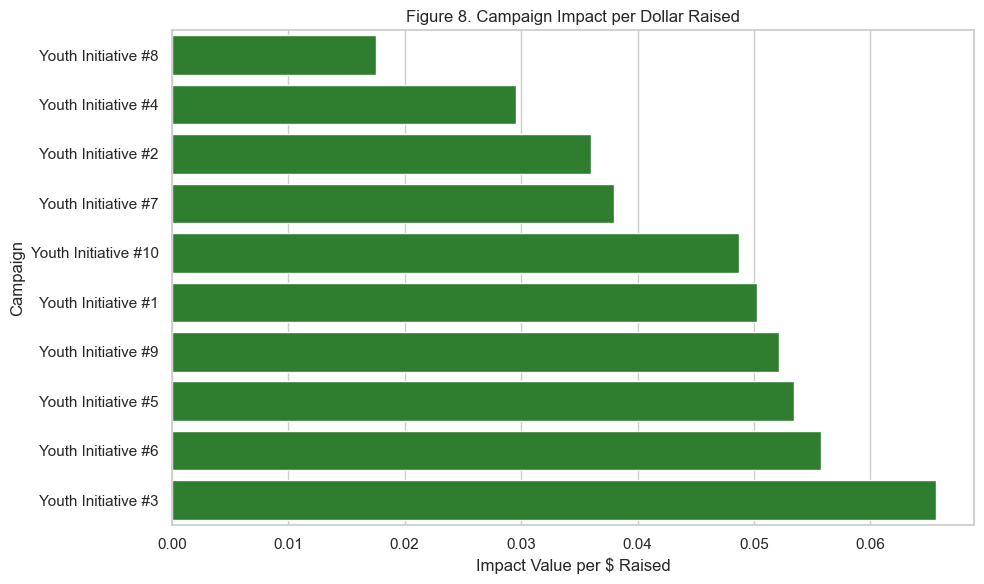

In [196]:
# Calculate impact per dollar
impact_total = impact.groupby('CampaignID')['Value'].sum().reset_index(name='TotalImpact')
merged_campaigns = pd.merge(campaigns, impact_total, on='CampaignID', how='left')
merged_campaigns['ImpactPerDollar'] = merged_campaigns['TotalImpact'] / merged_campaigns['ActualAmount']

# Sort and plot
merged_campaigns = merged_campaigns.sort_values('ImpactPerDollar', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_campaigns, y='CampaignName', x='ImpactPerDollar', color='forestgreen')
plt.title('Figure 8. Campaign Impact per Dollar Raised')
plt.xlabel('Impact Value per $ Raised')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()

**Figure 5.** Campaign Impact per Dollar Raised  
This chart ranks campaigns based on how efficiently they converted funds into measurable outcomes, offering a way to evaluate value for money and impact alignment.

<h2>5. RFM Segmentation & Donor Profiling</h2>

<p>
Understanding donor behaviour is central to nonprofit success. To go beyond general trends, we applied a modified <strong>RFM (Recency, Frequency, Monetary)</strong> framework to classify supporters into meaningful behavioural segments. This helped uncover who is most engaged, who is at risk, and where future opportunities lie.
</p>

<h3>5.1 Segment Definitions & Rules</h3>

<p>
Segments were defined not just by numerical thresholds, but by donation timing, volume, and engagement behaviour. This hybrid approach combines logic-based rules with real-world donor profiles commonly seen in the nonprofit sector:
</p>

<ul>
  <li><strong>New Donor:</strong> First donation in the last 12 months, under 500 dollars total.</li>
  <li><strong>Loyal:</strong> Donated in each of the last three calendar years.</li>
  <li><strong>High Value Potential:</strong> Donated over 500 dollars in any one gift in the past three years.</li>
  <li><strong>At Risk:</strong> Last donation was more than 18 months ago.</li>
  <li><strong>Low Frequency:</strong> Fewer than 3 donations and total giving under $250.</li>
  <li><strong>Inactive:</strong> Last donation was more than 3 years ago.</li>
  <li><strong>Never Donated:</strong> No donations recorded.</li>
  <li><strong>Unclassified:</strong> Did not meet specific criteria above.</li>
</ul>

<p>
This segmentation provides a deeper lens into the value, commitment, and engagement potential of different donor groups.
</p>

In [237]:
# Convert DonationDate column to datetime
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'])

# Reference point
today = pd.to_datetime('today')
one_year_ago = today - pd.DateOffset(months=12)
three_years_ago = today - pd.DateOffset(years=3)
eighteen_months_ago = today - pd.DateOffset(months=18)

# Create donor-level summary from donations
donor_summary = donations.groupby('DonorID').agg(
    FirstDonationDate=('DonationDate', 'min'),
    LastDonationDate=('DonationDate', 'max'),
    TotalDonations=('DonationID', 'count'),
    TotalAmount=('Amount', 'sum')
).reset_index()

# Identify high-value and loyal donors
recent_donations = donations[donations['DonationDate'] >= three_years_ago]
high_value_donors = recent_donations[recent_donations['Amount'] > 500]['DonorID'].unique()

donations['Year'] = donations['DonationDate'].dt.year
year_now = today.year
loyal_group = donations[donations['Year'].isin([year_now-2, year_now-1, year_now])]
loyal_counts = loyal_group.groupby('DonorID')['Year'].nunique()
loyal_donors = loyal_counts[loyal_counts == 3].index.tolist()

# Load full donor list
donors_full = pd.read_csv(base_path + 'donors.csv')

# Merge with donor summary to include non-donors
donor_full_summary = pd.merge(donors_full[['DonorID']], donor_summary, on='DonorID', how='left')

# Fill NaNs for non-donors
donor_full_summary['FirstDonationDate'] = pd.to_datetime(donor_full_summary['FirstDonationDate'])
donor_full_summary['LastDonationDate'] = pd.to_datetime(donor_full_summary['LastDonationDate'])
donor_full_summary['TotalDonations'] = donor_full_summary['TotalDonations'].fillna(0)
donor_full_summary['TotalAmount'] = donor_full_summary['TotalAmount'].fillna(0)

# Assign segments
segment_assignment = {}
for index, row in donor_full_summary.iterrows():
    donor_id = row['DonorID']
    first_donation = row['FirstDonationDate']
    last_donation = row['LastDonationDate']
    total_donations = row['TotalDonations']
    total_amount = row['TotalAmount']

    if total_donations == 0:
        segment = 'Never Donated'
    elif donor_id in high_value_donors:
        segment = 'High Value Potential'
    elif donor_id in loyal_donors and last_donation >= one_year_ago:
        segment = 'Loyal'
    elif donor_id in loyal_donors and last_donation < one_year_ago:
        segment = 'Lapsed Loyal'
    elif first_donation >= one_year_ago and total_amount <= 500:
        segment = 'New Donor'
    elif last_donation < eighteen_months_ago:
        segment = 'At Risk'
    elif total_donations <= 2 and total_amount < 250:
        segment = 'Low Frequency'
    elif last_donation < three_years_ago:
        segment = 'Inactive'
    else:
        segment = 'Unclassified'

    segment_assignment[donor_id] = segment

# Map segments
donor_full_summary['Segment'] = donor_full_summary['DonorID'].map(segment_assignment)

# Segment summary
segment_summary = donor_full_summary['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']

# Display
print(segment_summary)


                Segment  Count
0               At Risk   2756
1          Unclassified   1706
2         Low Frequency    168
3         Never Donated    122
4                 Loyal     54
5             New Donor     43
6  High Value Potential     42


<h3>5.2 Donor Segment Distribution</h3>

<p>The chart below highlights that a large proportion of donors are classified as <em>At Risk</em> or <em>Unclassified</em>, while only a small share fall under <em>Loyal</em> or <em>High Value</em> segments. This uneven distribution suggests that acquisition is not the issue—but retention and consistency are.</p>

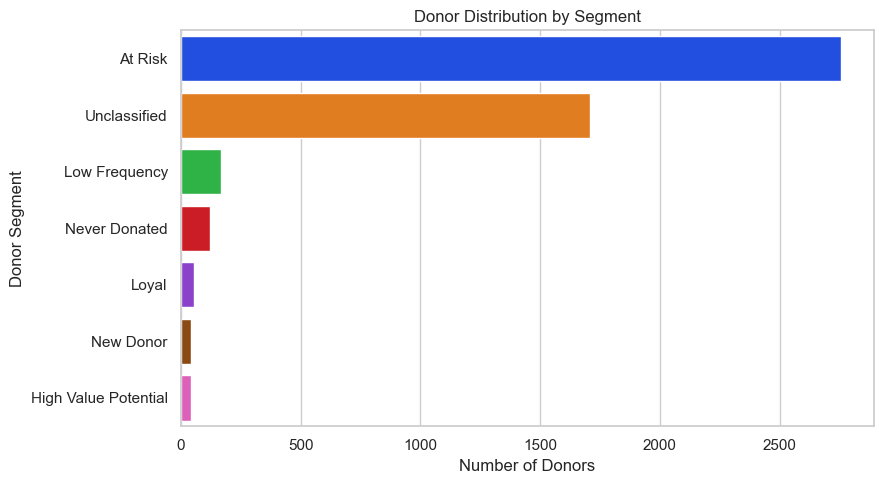

In [243]:
plt.figure(figsize=(9, 5))
sns.barplot(data=segment_summary, x='Count', y='Segment', hue = 'Segment', palette='bright')
plt.title('Donor Distribution by Segment')
plt.xlabel('Number of Donors')
plt.ylabel('Donor Segment')
plt.tight_layout()
plt.show()


<h>**Figure 6.** Donor Distribution by Segment </h>

This chart highlights that the majority of donors fall into the "At Risk" and "Unclassified" categories, suggesting significant opportunities for targeted re-engagement or improved segmentation logic. Proactive strategies could help shift these donors into more engaged, value-driven groups._

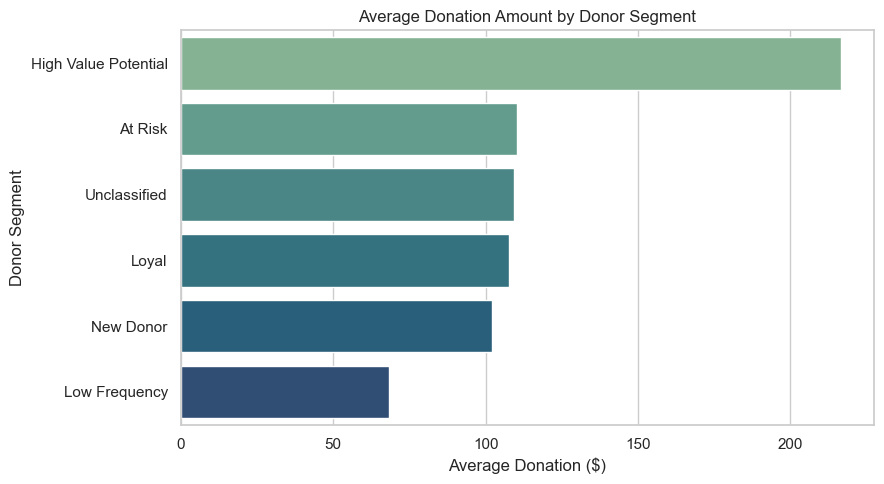

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge segment info into donations
donations_with_segments = pd.merge(
    donations,
    donor_full_summary[['DonorID', 'Segment']],
    on='DonorID',
    how='left'
)

# Group by segment to get average donation
avg_donation = donations_with_segments.groupby('Segment')['Amount'].mean().reset_index()
avg_donation = avg_donation.sort_values('Amount', ascending=False)

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=avg_donation, x='Amount', y='Segment', hue = 'Segment', palette='crest',)
plt.title('Average Donation Amount by Donor Segment')
plt.xlabel('Average Donation ($)')
plt.ylabel('Donor Segment')
plt.tight_layout()
plt.show()


<strong>Figure 7.:</strong> Although Loyal and High Value Potential donors make up a small portion of the total donor base, they contribute significantly higher average donation amounts. These segments should be prioritised for tailored stewardship and high-touch engagement.
</div>


<h3>5.3 Missed Opportunities</h3>

<p>
Using the segment data, we identified several behavioural gaps that may currently be overlooked:
</p>

<ul>
  <li><strong>Loyal donors not engaged in the last 6 months</strong> – despite consistent support history</li>
  <li><strong>High Value donors who haven't been contacted</strong> – risking future contribution loss</li>
  <li><strong>Large segments with no engagement history</strong> – no known communication or follow-up</li>
</ul>

In [244]:
# Ensure engagement dates are datetime
engagements['Date'] = pd.to_datetime(engagements['Date'])

# Define "recent" window — 6 or 12 months
six_months_ago = pd.to_datetime('today') - pd.DateOffset(months=6)

# Get most recent engagement per donor
last_engagement = engagements.groupby('DonorID')['Date'].max().reset_index()
last_engagement.columns = ['DonorID', 'LastEngagedDate']

# Merge with segments
loyal_high = donor_full_summary[
    donor_full_summary['Segment'].isin(['Loyal', 'High Value Potential'])
][['DonorID', 'Segment']]

loyal_high = loyal_high.merge(last_engagement, on='DonorID', how='left')

# Flag those not engaged recently
loyal_high['EngagedRecently'] = loyal_high['LastEngagedDate'] >= six_months_ago
missed_engagements = loyal_high[loyal_high['EngagedRecently'] != True]


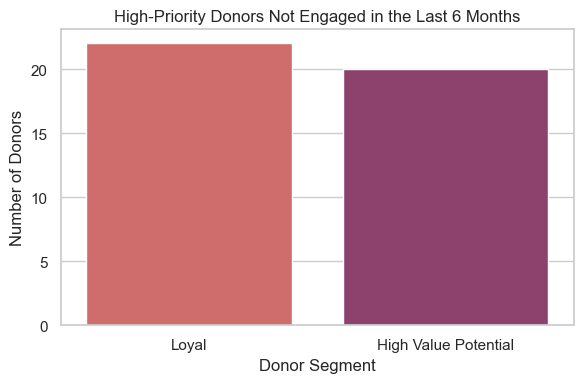

In [247]:
# Count by segment
missed_counts = missed_engagements['Segment'].value_counts().reset_index()
missed_counts.columns = ['Segment', 'Count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=missed_counts, x='Segment', y='Count', hue='Segment', palette='flare')
plt.title('High-Priority Donors Not Engaged in the Last 6 Months')
plt.xlabel('Donor Segment')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()


<strong>Figure 8.</strong> Over half of Loyal and High Value Potential donors have not been engaged in the last six months. Proactive outreach to these supporters could significantly improve retention and revenue.
</div>


In [248]:
# Merge segment info into donations
donations_with_segments = pd.merge(
    donations,
    donor_full_summary[['DonorID', 'Segment']],
    on='DonorID',
    how='left'
)

# Aggregate: total donation value and donor count per segment
segment_performance = donations_with_segments.groupby('Segment').agg({
    'Amount': 'sum',
    'DonorID': pd.Series.nunique
}).reset_index()

segment_performance.columns = ['Segment', 'TotalDonated', 'DonorCount']

# Sort by donation volume
segment_performance = segment_performance.sort_values('TotalDonated', ascending=False)


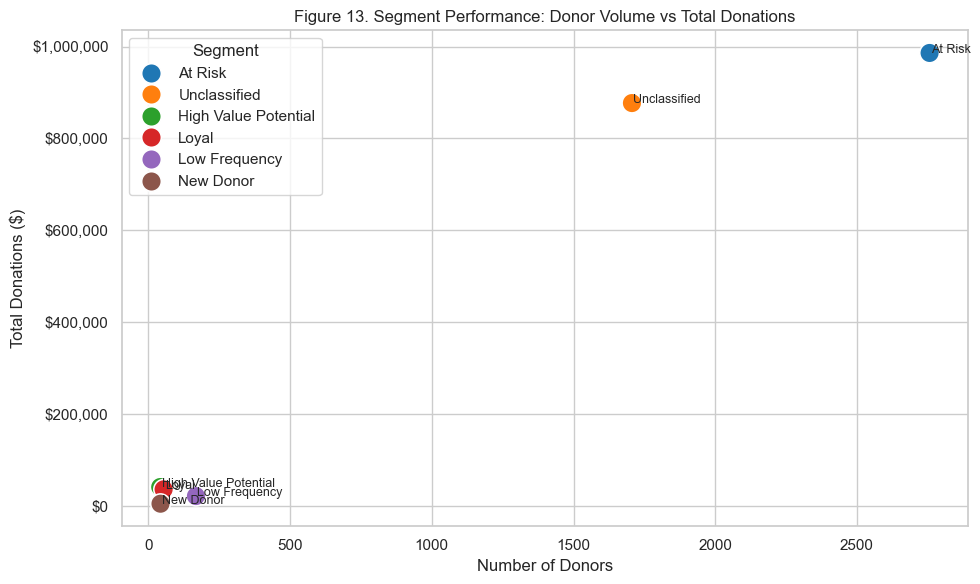

In [275]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=segment_performance, x='DonorCount', y='TotalDonated', hue='Segment', s=200, palette='tab10')

# Annotate each point
for i in range(segment_performance.shape[0]):
    plt.text(
        x=segment_performance['DonorCount'].iloc[i] + 5,
        y=segment_performance['TotalDonated'].iloc[i],
        s=segment_performance['Segment'].iloc[i],
        fontdict=dict(size=9)
    )

plt.title('Figure 13. Segment Performance: Donor Volume vs Total Donations')
plt.xlabel('Number of Donors')
plt.ylabel('Total Donations ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  #$Format added
plt.tight_layout()
plt.show()

<p><strong>Figure 9.</strong> Segment Performance: Donor Volume vs Total Donations</p>
<p>This scatterplot compares the number of donors in each behavioural segment with the total amount they have donated. It helps identify which segments drive the most value and where strategic re-engagement could yield better results.</p>


<h2> References</h2>

<ul>
  <li>
    Analytics for Good Institute. (2020). <em>Data science for social impact: Challenges and strategies in the nonprofit sector</em>. https://analyticsforgood.org/reports
  </li>
  <li>
    Association of Fundraising Professionals. (2021). <em>Fundraising effectiveness project: 2021 annual report</em>. https://afpglobal.org/fep
  </li>
  <li>
    Business Data Analytics Guide v1.0. (2019). International Institute of Business Analysis (IIBA).
  </li>
  <li>
    Charity Digital. (2022). <em>How to re-engage lapsed donors</em>. https://charitydigital.org.uk/topics/how-to-reengage-lapsed-donors-9835
  </li>
  <li>
    Gallo, A. (2014). <em>A refresher on marketing ROI</em>. Harvard Business Review. https://hbr.org/2014/07/a-refresher-on-marketing-roi
  </li>
  <li>
    McKinsey & Company. (2020). <em>How nonprofits can better use data to drive decisions</em>. https://www.mckinsey.com/industries/social-sector/our-insights/how-nonprofits-can-better-use-data
  </li>
  <li>
    Pirkova, D. (2023). <em>The ethics of synthetic data in AI systems</em>. Mozilla Foundation. https://foundation.mozilla.org/en/blog/ethics-of-synthetic-data
  </li>
  <li>
    TechSoup. (2021). <em>Data-driven strategies for nonprofits</em>. https://blog.techsoup.org/posts/data-driven-strategies-for-nonprofits
  </li>
</ul>


### TBC